In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from astropy import units as u
import numpy as np


In [5]:
stem = '/Users/eckhartspalding/Documents/git.repos/life_detectors/notebooks/data/'
file_name_eckhart = stem + 'objs_eckhart.pkl'
file_name_felix = stem + 'objs_felix.pkl'

In [6]:
with open(file_name_eckhart, 'rb') as f:
    wavel_eckhart, term_i_eckhart, term_ii_eckhart, I_lambda_los_array_photons = pickle.load(f)

In [ ]:
with open(file_name_felix, 'rb') as f:
    wavel_felix, wavel_bins_felix, term_i_felix, term_ii_felix, photon_flux_ph_persec_perwavelbin = pickle.load(f)

# normalize photon flux so that it's /m**2 (wrong??)
# tot_collecting_area_felix = 4. * np.pi * (2.0 * u.m / 2.)**2

# add units to Felix's quantities
wavel_felix = (wavel_felix * u.m).to(u.micron)
term_i_felix = (term_i_felix / (1e6 * wavel_bins_felix)) * u.ph / (u.micron * u.sr * u.second * u.m**2) 
photon_flux_ph_persec_permetersqd = (photon_flux_ph_persec_perwavelbin / (1e6 * wavel_bins_felix)) * u.ph / (u.micron * u.second * u.m**2)
#photon_flux_ph_persec_perwavelbin_permetersqd = photon_flux_ph_persec_perwavelbin_permetersqd .to(I_lambda_los_array_photons.unit)

In [11]:
term_i_felix

<Quantity [9.14581352e+18, 1.05997493e+19, 1.30409067e+19, 1.67093276e+19,
           2.18604777e+19, 2.87471289e+19, 3.75971224e+19, 4.85889307e+19,
           6.18275328e+19, 7.73233948e+19, 9.49772079e+19, 1.14572514e+20,
           1.35777493e+20, 1.58156151e+20, 1.81188079e+20, 2.04295017e+20,
           2.26871777e+20, 2.48318736e+20, 2.68073096e+20, 2.85636465e+20,
           3.00596832e+20, 3.12643753e+20, 3.21576269e+20, 3.27303804e+20,
           3.29840799e+20, 3.29296280e+20, 3.25859757e+20, 3.19784876e+20,
           3.11372213e+20, 3.00952356e+20, 2.91305832e+20] ph / (micron s sr m2)>

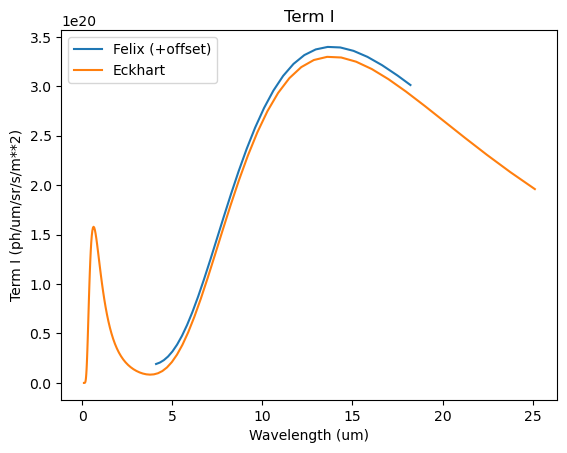

In [20]:
plt.clf()
plt.title('Term I')
plt.plot(wavel_felix, term_i_felix.value + 0.1e20, label='Felix (+offset)')
plt.plot(wavel_eckhart, term_i_eckhart, label='Eckhart')
plt.xlabel('Wavelength (um)')
plt.ylabel('Term I (ph/um/sr/s/m**2)')
plt.legend()
plt.savefig('/Users/eckhartspalding/Downloads/junk_term_i.png')


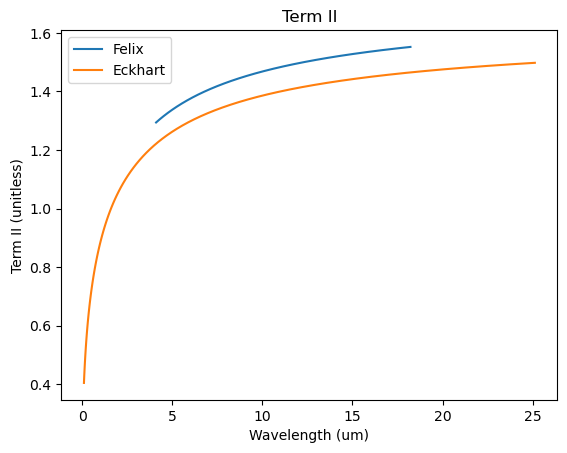

In [18]:
plt.clf()
plt.title('Term II')
plt.plot(wavel_felix, term_ii_felix, label='Felix')
plt.plot(wavel_eckhart, term_ii_eckhart, label='Eckhart')
plt.xlabel('Wavelength (um)')
plt.ylabel('Term II (unitless)')
plt.legend()
plt.savefig('/Users/eckhartspalding/Downloads/junk_term_ii.png')


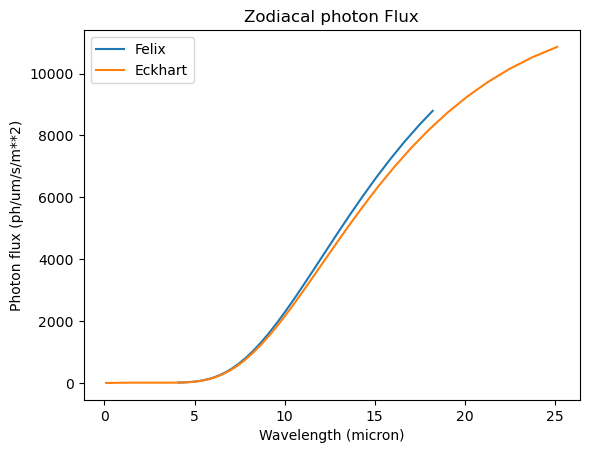

In [21]:
plt.clf()
plt.title('Zodiacal photon Flux')
plt.plot(wavel_felix, photon_flux_ph_persec_permetersqd, label='Felix')
plt.plot(wavel_eckhart, I_lambda_los_array_photons, label='Eckhart')
plt.xlabel('Wavelength (micron)')
plt.ylabel('Photon flux (ph/um/s/m**2)')
plt.legend()
plt.savefig('/Users/eckhartspalding/Downloads/junk_zodiacal.png')


In [2]:
# some basic function checking

# numerator on RHS of Eqn. 5.2 in Kendall+ 
def num_(lambda_, beta_):

    result = np.pi/np.arccos(np.cos(lambda_ * np.pi/180.) * np.cos(beta_ * np.pi/180.))

    return result

# denominator
def denom_(lambda_, beta_, wavel_):

    result = ( (np.sin(beta_ * np.pi/180.) ** 2.) + ( 0.6 * (wavel_ / 11.) ** (-0.4) ) * np.cos(beta_ * np.pi/180.) ** 2. ) ** 0.5

    return result



In [6]:
lambda_ = 99.04522613065326
beta_ = -71.81818181818181
wavel_ = 5.

print(num_(lambda_=lambda_, beta_=beta_))
print(denom_(lambda_=lambda_, beta_=beta_, wavel_=wavel_))
print(num_(lambda_=lambda_, beta_=beta_) / denom_(lambda_=lambda_, beta_=beta_, wavel_=wavel_))

1.939407885954485
0.9913197575863347
1.9563898238814035
